In [1]:
# Import pandas matplotlib and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
import os
path = 'G:\Projects\Olist\RFM'
files = os.listdir(path)
for file in files:
    print(file)

average_quantity.csv
chapter_1.zip
chapter_2_2.zip
cohort_counts.csv
datamart_rfm.csv
datamart_rfm_and_scores.csv
datamart_rfm_scores_named_segment.csv
online.csv
online12M.csv
__MACOSX


In [3]:
#loading data into notebook
df = pd.read_csv(r"G:\Projects\Olist\RFM\online.csv")

In [4]:
df.shape

(70864, 9)

In [5]:
df.head()

,Unnamed: 0,order_id,StockCode,Description,Quantity,purchase_date,UnitPrice,customer_id,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,10/25/2011 8:26,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,11/20/2011 11:56,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,07/14/2011 13:35,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,11/23/2011 15:53,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,05/25/2011 13:36,5.95,17663,United Kingdom


In [6]:
# Define a function that will parse the date
def get_day(x):
    return dt.datetime.strptime(x, "%m/%d/%Y %H:%M")

In [7]:
# Create InvoiceDay column
df['purchase_date'] = df['purchase_date'].apply(get_day) 

In [8]:
#check the values in 'InvoiceDay' column
for date in df['purchase_date'][:5]:
    print(date)

2011-10-25 08:26:00
2011-11-20 11:56:00
2011-07-14 13:35:00
2011-11-23 15:53:00
2011-05-25 13:36:00


In [9]:
# Group by CustomerID and select the purchase_date value
grouped_df = df.groupby('customer_id')['purchase_date']

# Check grouped_df values
grouped_df.head()

0       2011-10-25 08:26:00
1       2011-11-20 11:56:00
2       2011-07-14 13:35:00
3       2011-11-23 15:53:00
4       2011-05-25 13:36:00
                ...        
70816   2011-10-14 10:38:00
70817   2011-12-05 14:01:00
70848   2011-02-23 09:44:00
70857   2011-12-06 17:18:00
70860   2010-12-09 11:30:00
Name: purchase_date, Length: 15619, dtype: datetime64[ns]

In [10]:
# Assign a minimum InvoiceDay value to the dataset as a new 'CohortDay' column
df['CohortDay']= grouped_df.transform('min')

#check values of 'CohortDay' column
df.head()

,Unnamed: 0,order_id,StockCode,Description,Quantity,purchase_date,UnitPrice,customer_id,Country,CohortDay
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-04-11 08:16:00
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-09-12 13:50:00
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-02-25 14:11:00


In [11]:
#Create Function to Get the integers for date parts
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month,day

In [12]:
# Get the integers for date parts from the `purcahse_date` column
purchase_year, purchase_month, purchase_day = get_date_int(df,'purchase_date')

# Get the integers for date parts from the `CohortDay` column
Cohort_year, Cohort_month, Cohort_day = get_date_int(df,'CohortDay')

In [13]:
# Calculate difference in years
years_diff = purchase_year - Cohort_year

# Calculate difference in months
months_diff = purchase_month - Cohort_month

# Calculate difference in days
days_diff = purchase_day - Cohort_day

# Extract the difference in days from all previous values
df['CohorIndex'] = years_diff*12 + months_diff +1

#check CohortIndex Column
df.head()

,Unnamed: 0,order_id,StockCode,Description,Quantity,purchase_date,UnitPrice,customer_id,Country,CohortDay,CohorIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-04-11 08:16:00,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-09-12 13:50:00,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-02-25 14:11:00,4


In [14]:
#create function to get the month of a given date column
def get_month(column):
    return dt.datetime(column.year, column.month, 1)

In [15]:
#create purchase_month column
df['purchase_month'] = df['purchase_date'].apply(get_month)

#check purchase_month column
df.head()


,Unnamed: 0,order_id,StockCode,Description,Quantity,purchase_date,UnitPrice,customer_id,Country,CohortDay,CohorIndex,purchase_month
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-04-11 08:16:00,7,2011-10-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-09-12 13:50:00,3,2011-11-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,1,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,1,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-02-25 14:11:00,4,2011-05-01


In [16]:
#create cohort_month column
grouping = df.groupby('customer_id')['purchase_month']

df['cohort_month'] = grouping.transform('min')

#check purchase_month column
df.head()


,Unnamed: 0,order_id,StockCode,Description,Quantity,purchase_date,UnitPrice,customer_id,Country,CohortDay,CohorIndex,purchase_month,cohort_month
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-04-11 08:16:00,7,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-09-12 13:50:00,3,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,1,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,1,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-02-25 14:11:00,4,2011-05-01,2011-02-01


## Count monthly active customers from each cohort

In [17]:
#count monthly active customers from each cohort
grouping = df.groupby(['cohort_month','CohorIndex'])

cohort_data = grouping['customer_id'].apply(pd.Series.nunique)

#check cohort_data table
cohort_data.head()

cohort_month  CohorIndex
2010-12-01    1             716
              2             246
              3             221
              4             251
              5             245
Name: customer_id, dtype: int64

In [18]:
#reset index for cohort_data to be able to access columns that stored as indeces
cohort_data = cohort_data.reset_index()

#create cohort_counts table
cohort_counts = cohort_data.pivot_table(
                                  index = 'cohort_month',
                                  columns = 'CohorIndex',
                                  values = 'customer_id'
                                    )

#check cohort_counts table
cohort_counts.head(10)

CohorIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate retention rate 

In [19]:
# Select the first column and store it to cohort_sizes table
cohort_sizes = cohort_counts.iloc[:,0]

#check values of cohort_sizes table
cohort_sizes.head(10)

cohort_month
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
2011-05-01    249.0
2011-06-01    207.0
2011-07-01    173.0
2011-08-01    139.0
2011-09-01    279.0
Name: 1, dtype: float64

In [20]:
# Divide the cohort count by cohort sizes along the rows to get Retention
retention = cohort_counts.divide(cohort_sizes,axis=0)

#check retention table
retention.head(10)

CohorIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#display retention as percentages
retention.round(3)*100

CohorIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Retention Rates Visualization in a Heatmap

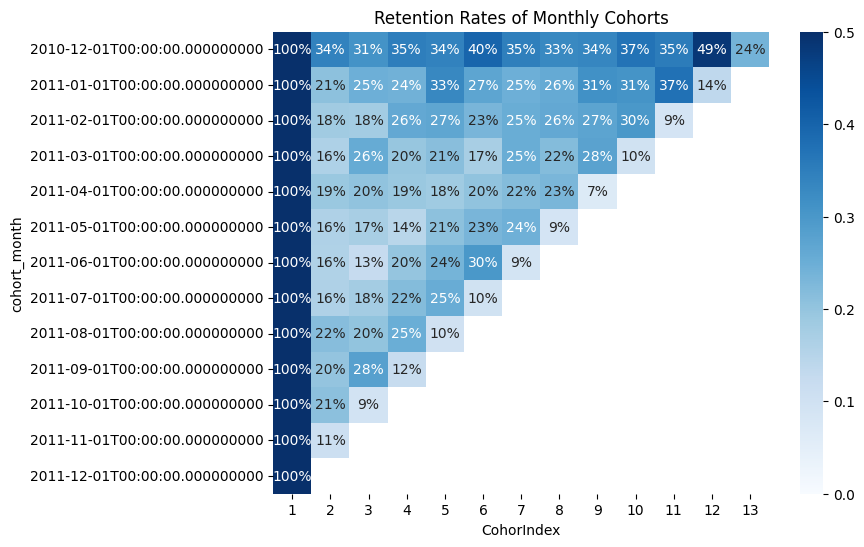

In [22]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Retention Rates of Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = retention, 
            annot=True, 
            fmt = '.0%',
            vmin = .0,
            vmax = .5,
            cmap='Blues')
plt.show()

## Calculate Average Price

In [23]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping =  df.groupby(['cohort_month','CohorIndex'])

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()/10

#check values in cohort_data table
cohort_data.head(20)

cohort_month  CohorIndex
2010-12-01    1             0.303591
              2             0.304406
              3             0.299507
              4             0.283518
              5             0.272707
              6             0.691520
              7             0.279949
              8             0.297523
              9             0.272356
              10            0.266242
              11            0.296971
              12            0.283500
              13            0.263326
2011-01-01    1             0.316292
              2             0.314135
              3             0.295842
              4             0.300894
              5             0.313122
              6             0.303101
              7             0.296525
Name: UnitPrice, dtype: float64

In [24]:
#reset index
cohort_data = cohort_data.reset_index()

#check values of cohort_data table
cohort_data.head()

,cohort_month,CohorIndex,UnitPrice
0,2010-12-01,1,0.303591
1,2010-12-01,2,0.304406
2,2010-12-01,3,0.299507
3,2010-12-01,4,0.283518
4,2010-12-01,5,0.272707


In [25]:
# Create a pivot 
average_price = cohort_data.pivot_table(
                                        index = 'cohort_month',
                                        columns = 'CohorIndex',
                                        values = 'UnitPrice')
#check values of pivot table
average_price.head(10)

CohorIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,0.303591,0.304406,0.299507,0.283518,0.272707,0.691520,0.279949,0.297523,0.272356,0.266242,0.296971,0.28350,0.263326
2011-01-01,0.316292,0.314135,0.295842,0.300894,0.313122,0.303101,0.296525,0.246253,0.271241,0.292020,0.255107,0.20085,NaN
2011-02-01,0.308643,0.395340,0.330735,0.291690,0.328011,0.292139,0.281450,0.268004,0.290902,0.272882,0.308476,NaN,NaN
2011-03-01,0.352878,0.362181,0.350920,0.276023,0.273715,0.247153,0.265124,0.291242,0.253737,0.244005,NaN,NaN,NaN
2011-04-01,0.329561,0.444018,0.341328,0.258491,0.284375,0.278061,0.283799,0.263103,0.260611,NaN,NaN,NaN,NaN
2011-05-01,0.311660,0.276892,0.247853,0.271516,0.245081,0.230640,0.270450,0.229008,NaN,NaN,NaN,NaN,NaN
2011-06-01,0.279120,0.244148,0.269176,0.313065,0.247922,0.241920,0.250086,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,0.318235,0.310947,0.338262,0.250697,0.237668,0.227462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.288327,0.366258,0.538117,0.685215,0.417659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#round values of averag_price table
average_price.round(1)

CohorIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,0.3,0.3,0.3,0.3,0.3,0.7,0.3,0.3,0.3,0.3,0.3,0.3,0.3
2011-01-01,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.3,0.3,0.2,NaN
2011-02-01,0.3,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN,NaN
2011-03-01,0.4,0.4,0.4,0.3,0.3,0.2,0.3,0.3,0.3,0.2,NaN,NaN,NaN
2011-04-01,0.3,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN
2011-05-01,0.3,0.3,0.2,0.3,0.2,0.2,0.3,0.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,0.3,0.2,0.3,0.3,0.2,0.2,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,0.3,0.3,0.3,0.3,0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.3,0.4,0.5,0.7,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


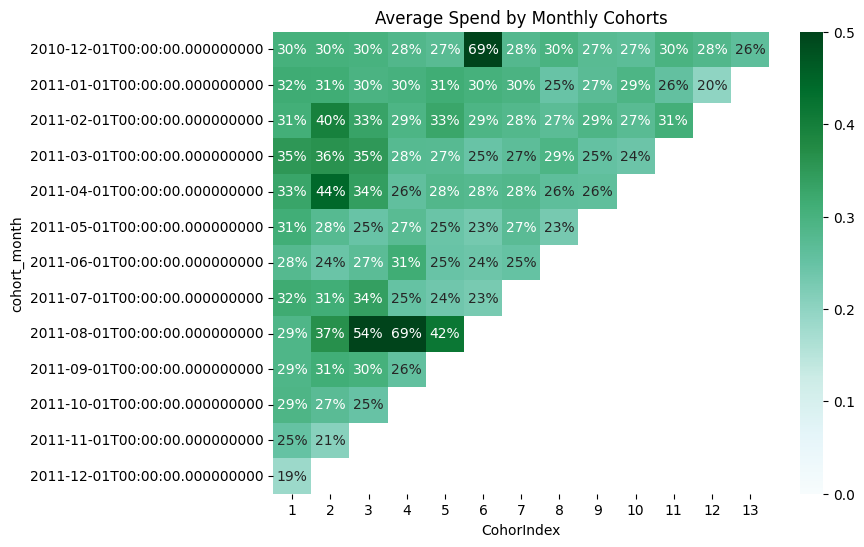

In [27]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_price, 
            annot=True, 
            fmt = '.0%',
            vmin = .0,
            vmax = .5,
            cmap='BuGn')
plt.show()

# RFM

In [28]:
df['spend'] = df['UnitPrice'] * df['Quantity']

df.head()

,Unnamed: 0,order_id,StockCode,Description,Quantity,purchase_date,UnitPrice,customer_id,Country,CohortDay,CohorIndex,purchase_month,cohort_month,spend
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-04-11 08:16:00,7,2011-10-01,2011-04-01,12.60
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-09-12 13:50:00,3,2011-11-01,2011-09-01,1.45
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,1,2011-07-01,2011-07-01,22.50
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,1,2011-11-01,2011-11-01,2.10
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-02-25 14:11:00,4,2011-05-01,2011-02-01,17.85


In [29]:
#create df of customers with aggregated spends for each customer
spend_df = df.groupby('customer_id')['spend'].sum().reset_index()

spend_df.head()

,customer_id,spend
0,12747,992.82
1,12748,7522.06
2,12749,813.45
3,12820,268.02
4,12822,146.15


In [30]:
# Create a spend quartile with 4 groups - a range between 1 and 5
spend_df['Spend_Quartile'] = pd.qcut(spend_df['spend'], q=4, labels=range(1,5))

#check spend_df table values
spend_df.head()

,customer_id,spend,Spend_Quartile
0,12747,992.82,4
1,12748,7522.06,4
2,12749,813.45,4
3,12820,268.02,3
4,12822,146.15,3


In [31]:
#create a copy of dataframe with recency column in days
df_copy = df.copy()

df_copy['cohort_days'] = days_diff

df_copy.head()

,Unnamed: 0,order_id,StockCode,Description,Quantity,purchase_date,UnitPrice,customer_id,Country,CohortDay,CohorIndex,purchase_month,cohort_month,spend,cohort_days
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-04-11 08:16:00,7,2011-10-01,2011-04-01,12.60,14
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-09-12 13:50:00,3,2011-11-01,2011-09-01,1.45,8
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,1,2011-07-01,2011-07-01,22.50,0
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,1,2011-11-01,2011-11-01,2.10,0
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-02-25 14:11:00,4,2011-05-01,2011-02-01,17.85,0


In [32]:
#create df of customers with aggregated spends for each customer
recency_df = df_copy.groupby('customer_id')['cohort_days'].sum().reset_index()

recency_df.head()

,customer_id,cohort_days
0,12747,281
1,12748,10187
2,12749,-117
3,12820,55
4,12822,34


In [33]:
#snapshot is the date of the day after the last transaction
snapshot_date = max(df['purchase_date']) + dt.timedelta(days=1)

In [34]:
# Calculate Recency, Frequency and Monetary value for each customer 
RFM_datamart = df.groupby(['customer_id']).agg({
    'purchase_date': lambda x: (snapshot_date - x.max()).days, #Recency = days since last customer purchase 
    'order_id': 'count', #Frequency = count of orders within 12 months for customer
    'spend': 'sum'}) #MonetaryValue = sum of spends within 12 months for customer

# Rename the columns 
RFM_datamart.rename(columns={'purchase_date': 'Recency',
                         'order_id': 'Frequency',
                         'spend': 'MonetaryValue'}, inplace=True)

RFM_datamart.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [35]:
#create reversed recency labels > because low recency values are better
r_labels = list(range(4, 0, -1))
print(r_labels)

[4, 3, 2, 1]


In [36]:
#Create groups of 4 segmentations for Recency, Frequency, MonetaryValue
RFM_datamart['R'] = pd.qcut(RFM_datamart['Recency'], q=4, labels = r_labels)

RFM_datamart['F'] = pd.qcut(RFM_datamart['Frequency'], q=4, labels = range(1,5))

RFM_datamart['M'] = pd.qcut(RFM_datamart['MonetaryValue'], q=4, labels = range(1,5))

#check RFM_datamart table
RFM_datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
customer_id,,,,,,
12747,2,27,992.82,4,4,4
12748,1,967,7522.06,4,4,4
12749,4,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,71,9,146.15,2,2,3


In [37]:
#calculate RFM score for each customer
RFM_datamart['RFM_Score'] = RFM_datamart[['R','F','M']].sum(axis=1)

RFM_datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
customer_id,,,,,,,
12747,2,27,992.82,4,4,4,12
12748,1,967,7522.06,4,4,4,12
12749,4,37,813.45,4,4,4,12
12820,3,17,268.02,4,3,3,10
12822,71,9,146.15,2,2,3,7


In [38]:
#create RFM segment for each customer

#concat values of R, F, M columns
def join_RFM (x):
        r_value = int(x['R'])
        f_value = int(x['F'])
        m_value = int(x['M'])
        return str(r_value) + str(f_value) + str(m_value)
               
#create 'RFM_Segment' column by concating values through join_RFM definition
RFM_datamart['RFM_Segment'] = RFM_datamart.apply(join_RFM,axis=1)

#check values
RFM_datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Segment
customer_id,,,,,,,,
12747,2,27,992.82,4,4,4,12,444
12748,1,967,7522.06,4,4,4,12,444
12749,4,37,813.45,4,4,4,12,444
12820,3,17,268.02,4,3,3,10,433
12822,71,9,146.15,2,2,3,7,223


In [39]:
RFM_datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069,7.443394
std,99.974969,44.831615,1474.285937,2.825434
min,1.000000,1.000000,0.650000,3.000000
25%,19.000000,4.000000,59.400000,5.000000
50%,52.000000,9.000000,140.300000,7.000000
75%,151.000000,21.000000,337.800000,10.000000
max,374.000000,1532.000000,59596.070000,12.000000


In [40]:
#create function of segmentation level
def RFM_level(df):
    if df['RFM_Score']>= 10:
        return 'High'
    elif df['RFM_Score']>= 6 and df['RFM_Score']<10:
        return'Medium'
    else:
        return 'Low'

In [41]:
# Create a new column RFM_Level
RFM_datamart['RFM_Level'] = RFM_datamart.apply(RFM_level, axis = 1)

#check values
RFM_datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Segment,RFM_Level
customer_id,,,,,,,,,
12747,2,27,992.82,4,4,4,12,444,High
12748,1,967,7522.06,4,4,4,12,444,High
12749,4,37,813.45,4,4,4,12,444,High
12820,3,17,268.02,4,3,3,10,433,High
12822,71,9,146.15,2,2,3,7,223,Medium


In [42]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFM_datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
High         20.4      47.8         978.0  1055
Low         190.0       3.3          53.5  1100
Medium       76.6      10.9         205.5  1546


In [43]:
#creat RFM_df
RFM_df = RFM_datamart[['Recency','Frequency','MonetaryValue']]

In [44]:
# diaplay summary statistics of Recency, Frequency, Monetary
RFM_df.describe()

,Recency,Frequency,MonetaryValue
count,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069
std,99.974969,44.831615,1474.285937
min,1.000000,1.000000,0.650000
25%,19.000000,4.000000,59.400000
50%,52.000000,9.000000,140.300000
75%,151.000000,21.000000,337.800000
max,374.000000,1532.000000,59596.070000


In [45]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

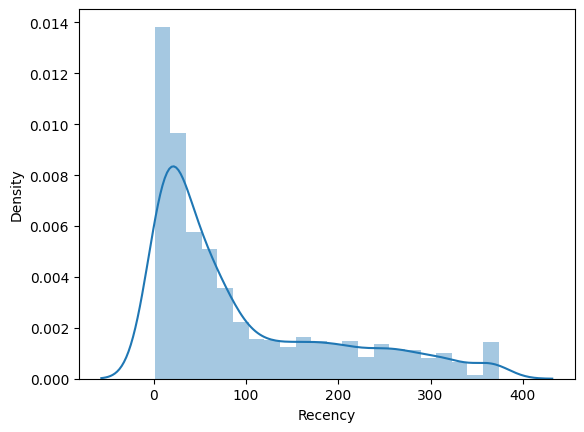

In [46]:
#display recency distribution
sns.distplot(RFM_df['Recency'])
plt.show()

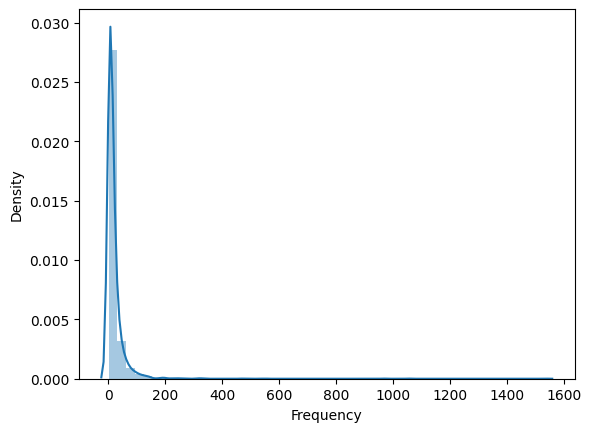

In [47]:
#display Frecuency distribution
sns.distplot(RFM_df['Frequency'])
plt.show()

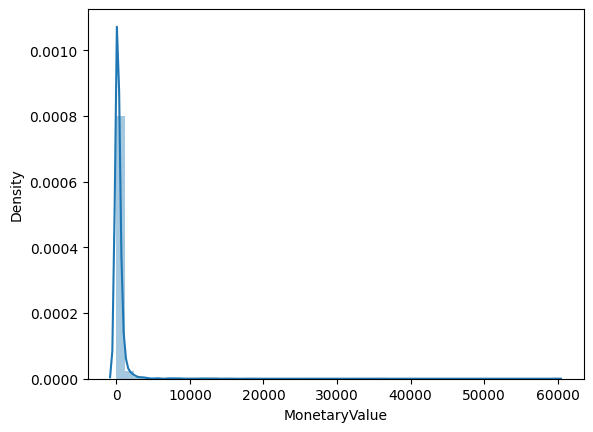

In [48]:
#display MonetaryValue distribution
sns.distplot(RFM_df['MonetaryValue'])
plt.show()

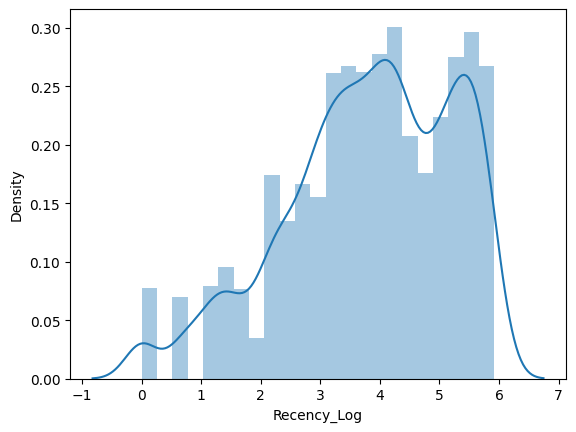

In [49]:
#log transformation of  Recency to have normal distribution
RFM_df['Recency_Log'] = np.log(RFM_df['Recency'])

sns.distplot(RFM_df['Recency_Log'] )
plt.show()

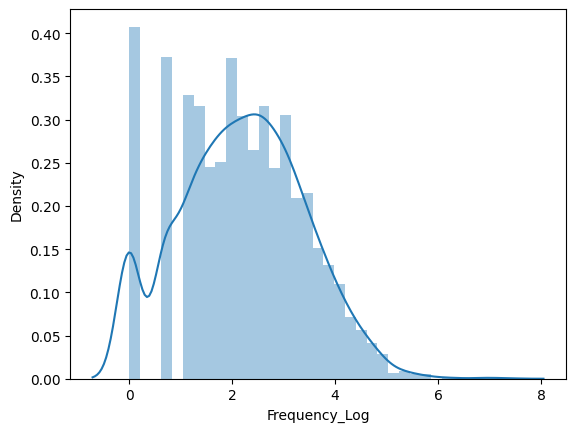

In [50]:
#log transformation of Frequency to have normal distribution
RFM_df['Frequency_Log'] = np.log(RFM_df['Frequency'])

sns.distplot(RFM_df['Frequency_Log'] )
plt.show()

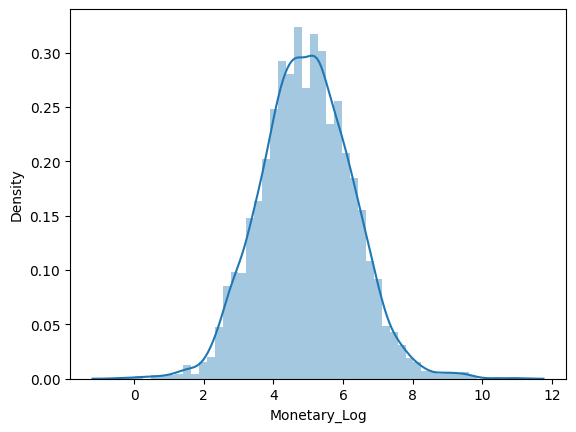

In [51]:
#log transformation of Monetary to have normal distribution
RFM_df['Monetary_Log'] = np.log(RFM_df['MonetaryValue'])

sns.distplot(RFM_df['Monetary_Log'] )
plt.show()

In [52]:
#center the data by manually standarize average values for all varieables : Recency, Frequency, MonetaryValue
centered_datamart = RFM_df - RFM_df.mean()

#display summary statistic
centered_datamart.describe().round(2)

,Recency,Frequency,MonetaryValue,Recency_Log,Frequency_Log,Monetary_Log
count,3701.00,3701.00,3701.00,3701.00,3701.00,3701.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00
std,99.97,44.83,1474.29,1.42,1.22,1.32
min,-93.30,-18.15,-379.89,-3.81,-2.19,-5.38
25%,-75.30,-15.15,-321.14,-0.86,-0.80,-0.87
50%,-42.30,-10.15,-240.24,0.15,0.01,-0.01
75%,56.70,1.85,-42.74,1.21,0.86,0.87
max,279.70,1512.85,59215.53,2.12,5.15,6.05


In [53]:
#scale the data by manually standarize standard deviation values for all varieables : Recency, Frequency, MonetaryValue
scaled_datamart = RFM_df/ RFM_df.std()

#display summary statistic
scaled_datamart.describe().round(2)

,Recency,Frequency,MonetaryValue,Recency_Log,Frequency_Log,Monetary_Log
count,3701.00,3701.00,3701.00,3701.00,3701.00,3701.00
mean,0.94,0.43,0.26,2.68,1.79,3.76
std,1.00,1.00,1.00,1.00,1.00,1.00
min,0.01,0.02,0.00,0.00,0.00,-0.33
25%,0.19,0.09,0.04,2.08,1.14,3.10
50%,0.52,0.20,0.10,2.79,1.80,3.76
75%,1.51,0.47,0.23,3.54,2.50,4.43
max,3.74,34.17,40.42,4.18,6.02,8.36


In [54]:
# Normalize the data by applying both centering and scaling
normalized_datamart = (RFM_df - RFM_df.mean()) / RFM_df.std()

#display summary statistics of normalized data
normalized_datamart.describe().round(2)

,Recency,Frequency,MonetaryValue,Recency_Log,Frequency_Log,Monetary_Log
count,3701.00,3701.00,3701.00,3701.00,3701.00,3701.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.93,-0.40,-0.26,-2.68,-1.79,-4.09
25%,-0.75,-0.34,-0.22,-0.61,-0.66,-0.66
50%,-0.42,-0.23,-0.16,0.10,0.01,-0.00
75%,0.57,0.04,-0.03,0.85,0.70,0.66
max,2.80,33.75,40.17,1.49,4.22,4.60


In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(RFM_df)

StandardScaler()

In [57]:
# Scale and center the data
normalized_datamart = scaler.transform(RFM_df)

# Create a pandas DataFrame >> because RFM_df was turned into array in the previous step
normalized_datamart = pd.DataFrame(normalized_datamart, index=RFM_df.index, columns=RFM_df.columns)

#display summary statistics of normalized data
normalized_datamart.describe().round(2)

,Recency,Frequency,MonetaryValue,Recency_Log,Frequency_Log,Monetary_Log
count,3701.00,3701.00,3701.00,3701.00,3701.00,3701.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.93,-0.40,-0.26,-2.68,-1.79,-4.09
25%,-0.75,-0.34,-0.22,-0.61,-0.66,-0.66
50%,-0.42,-0.23,-0.16,0.10,0.01,-0.00
75%,0.57,0.04,-0.03,0.85,0.70,0.66
max,2.80,33.75,40.17,1.49,4.22,4.60


In [62]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(normalized_datamart)

# Extract cluster labels
cluster_labels = kmeans.labels_

#display cluster_labels values
print(cluster_labels)

[0 2 0 ... 1 0 0]
